# Exploratory Data Analysis

## Importing necessary libraries

In [1]:
import pandas as pd
from pathlib import Path
import os
import sys
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE

In [2]:
pd.set_option('display.max_columns', None)

In [3]:
# This line allows us to use import functions defined in ../src
sys.path.append('../src/')

In [4]:
from utils import change_money
from categorical import Encoder

In [5]:
! ls ../auto-insurance-fall-2017

auto-insurance-fall-2017.zip  SHELL_AUTO.csv  train_auto.csv
MEAN_AUTO.csv		      test_auto.csv


The data is stored in the directory ```data```. There are four files. ```MEAN_AUTO.csv``` and ```SHELL_AUTO``` are sample submissions, while ```train_auto.csv``` and ```test_auto.csv``` are the train and test datasets respectively.

In [6]:
data_dir = Path('../auto-insurance-fall-2017')

## Importing the data

First, I am going to import the train and test dataframes.

In [7]:
train_df = pd.read_csv(data_dir/'train_auto.csv')
test_df = pd.read_csv(data_dir/'test_auto.csv')

In [8]:
print(f"The shape of the train_df is {train_df.shape}")
print(f"The shape of the test_df is {test_df.shape}")

The shape of the train_df is (8161, 26)
The shape of the test_df is (2141, 26)


In [9]:
train_df.head()

,INDEX,TARGET_FLAG,TARGET_AMT,KIDSDRIV,AGE,HOMEKIDS,YOJ,INCOME,PARENT1,HOME_VAL,MSTATUS,SEX,EDUCATION,JOB,TRAVTIME,CAR_USE,BLUEBOOK,TIF,CAR_TYPE,RED_CAR,OLDCLAIM,CLM_FREQ,REVOKED,MVR_PTS,CAR_AGE,URBANICITY
0,1,0,0.0,0,60.0,0,11.0,"$67,349",No,$0,z_No,M,PhD,Professional,14,Private,"$14,230",11,Minivan,yes,"$4,461",2,No,3,18.0,Highly Urban/ Urban
1,2,0,0.0,0,43.0,0,11.0,"$91,449",No,"$257,252",z_No,M,z_High School,z_Blue Collar,22,Commercial,"$14,940",1,Minivan,yes,$0,0,No,0,1.0,Highly Urban/ Urban
2,4,0,0.0,0,35.0,1,10.0,"$16,039",No,"$124,191",Yes,z_F,z_High School,Clerical,5,Private,"$4,010",4,z_SUV,no,"$38,690",2,No,3,10.0,Highly Urban/ Urban
3,5,0,0.0,0,51.0,0,14.0,NaN,No,"$306,251",Yes,M,<High School,z_Blue Collar,32,Private,"$15,440",7,Minivan,yes,$0,0,No,0,6.0,Highly Urban/ Urban
4,6,0,0.0,0,50.0,0,NaN,"$114,986",No,"$243,925",Yes,z_F,PhD,Doctor,36,Private,"$18,000",1,z_SUV,no,"$19,217",2,Yes,3,17.0,Highly Urban/ Urban


In [10]:
test_df.head()

,INDEX,TARGET_FLAG,TARGET_AMT,KIDSDRIV,AGE,HOMEKIDS,YOJ,INCOME,PARENT1,HOME_VAL,MSTATUS,SEX,EDUCATION,JOB,TRAVTIME,CAR_USE,BLUEBOOK,TIF,CAR_TYPE,RED_CAR,OLDCLAIM,CLM_FREQ,REVOKED,MVR_PTS,CAR_AGE,URBANICITY
0,3,NaN,NaN,0,48.0,0,11.0,"$52,881",No,$0,z_No,M,Bachelors,Manager,26,Private,"$21,970",1,Van,yes,$0,0,No,2,10.0,Highly Urban/ Urban
1,9,NaN,NaN,1,40.0,1,11.0,"$50,815",Yes,$0,z_No,M,z_High School,Manager,21,Private,"$18,930",6,Minivan,no,"$3,295",1,No,2,1.0,Highly Urban/ Urban
2,10,NaN,NaN,0,44.0,2,12.0,"$43,486",Yes,$0,z_No,z_F,z_High School,z_Blue Collar,30,Commercial,"$5,900",10,z_SUV,no,$0,0,No,0,10.0,z_Highly Rural/ Rural
3,18,NaN,NaN,0,35.0,2,NaN,"$21,204",Yes,$0,z_No,M,z_High School,Clerical,74,Private,"$9,230",6,Pickup,no,$0,0,Yes,0,4.0,z_Highly Rural/ Rural
4,21,NaN,NaN,0,59.0,0,12.0,"$87,460",No,$0,z_No,M,z_High School,Manager,45,Private,"$15,420",1,Minivan,yes,"$44,857",2,No,4,1.0,Highly Urban/ Urban


### Inspecting NaN's

Now, let's look at NaN's. First let's see how what percent of datapoints is missing in each dataframe.

In [11]:
100*train_df.isna().mean()\
                .sort_values(ascending=False).head(10)

JOB            6.445289
CAR_AGE        6.249234
HOME_VAL       5.685578
YOJ            5.563044
INCOME         5.452763
AGE            0.073520
URBANICITY     0.000000
SEX            0.000000
TARGET_FLAG    0.000000
TARGET_AMT     0.000000
dtype: float64

In [12]:
100*test_df.isna().mean()\
                .sort_values(ascending=False).head(10)

TARGET_FLAG    100.000000
TARGET_AMT     100.000000
JOB              6.492293
CAR_AGE          6.025222
INCOME           5.838393
HOME_VAL         5.184493
YOJ              4.390472
AGE              0.046707
URBANICITY       0.000000
SEX              0.000000
dtype: float64

As we can see, these vales are not large for most columns (obviously excluding targets columns). It's also worth noting that the percent of missing values for a given column is more or less the same for both datasets. This may suggest, that the datasets come from the same distribution. However, we'll examine it more carefully later on. For the time being, I am going to leave them as they are. Later i Will fill them with some value e.g. '-99999'. Doing it now seems not to have sense, since we may want to look at the various statistics to compare the datasets and replacing NaN's may be misleading.

### Changing money format from

Looking at the data we see that the way in which the money is presented follows a pattern $XYZ,XYZ. We want to change it to XYZXYZ, as that's the way to present numerical data.

In [13]:
money_cols = ['INCOME', 'HOME_VAL', 'BLUEBOOK', 'OLDCLAIM']

In [14]:
train_df = change_money(train_df, money_cols)
test_df = change_money(test_df, money_cols)

Some columns have wrong data type. E.g. AGE should be an int or float instead of object.

In [15]:
train_df.dtypes

INDEX            int64
TARGET_FLAG      int64
TARGET_AMT     float64
KIDSDRIV         int64
AGE            float64
HOMEKIDS         int64
YOJ            float64
INCOME         float64
PARENT1         object
HOME_VAL       float64
MSTATUS         object
SEX             object
EDUCATION       object
JOB             object
TRAVTIME         int64
CAR_USE         object
BLUEBOOK       float64
TIF              int64
CAR_TYPE        object
RED_CAR         object
OLDCLAIM       float64
CLM_FREQ         int64
REVOKED         object
MVR_PTS          int64
CAR_AGE        float64
URBANICITY      object
dtype: object

In [16]:
test_df.dtypes

INDEX            int64
TARGET_FLAG    float64
TARGET_AMT     float64
KIDSDRIV         int64
AGE            float64
HOMEKIDS         int64
YOJ            float64
INCOME         float64
PARENT1         object
HOME_VAL       float64
MSTATUS         object
SEX             object
EDUCATION       object
JOB             object
TRAVTIME         int64
CAR_USE         object
BLUEBOOK       float64
TIF              int64
CAR_TYPE        object
RED_CAR         object
OLDCLAIM       float64
CLM_FREQ         int64
REVOKED         object
MVR_PTS          int64
CAR_AGE        float64
URBANICITY      object
dtype: object

In [17]:
for col in ['AGE', 'YOJ', 'CAR_AGE']:
    train_df[col] = train_df[col].astype(float)
    test_df[col] = test_df[col].astype(float)

In [18]:
train_df.dtypes

INDEX            int64
TARGET_FLAG      int64
TARGET_AMT     float64
KIDSDRIV         int64
AGE            float64
HOMEKIDS         int64
YOJ            float64
INCOME         float64
PARENT1         object
HOME_VAL       float64
MSTATUS         object
SEX             object
EDUCATION       object
JOB             object
TRAVTIME         int64
CAR_USE         object
BLUEBOOK       float64
TIF              int64
CAR_TYPE        object
RED_CAR         object
OLDCLAIM       float64
CLM_FREQ         int64
REVOKED         object
MVR_PTS          int64
CAR_AGE        float64
URBANICITY      object
dtype: object

In [19]:
numeric_cols = train_df.columns[train_df.dtypes!='object']
nonnumeric_cols = train_df.columns[train_df.dtypes=='object']

In [20]:
print(f"There are {len(numeric_cols)} numeric columns")
print(f"There are {len(nonnumeric_cols)} nonnumeric columns")

There are 16 numeric columns
There are 10 nonnumeric columns


## Numeric columns

First, let's have a look at the numeric columns. Obviously, there's no point in looking at some of them e.g. INDEX. However, they're left here for the sake of simplicity.

In [21]:
numeric_cols

Index(['INDEX', 'TARGET_FLAG', 'TARGET_AMT', 'KIDSDRIV', 'AGE', 'HOMEKIDS',
       'YOJ', 'INCOME', 'HOME_VAL', 'TRAVTIME', 'BLUEBOOK', 'TIF', 'OLDCLAIM',
       'CLM_FREQ', 'MVR_PTS', 'CAR_AGE'],
      dtype='object')

Let's look at the mean and standard deviation of each column. Another interesing thing to look at is to see how different are these statistics between the two datasets.

In [22]:
for col in numeric_cols:
    print(50*'=')
    print(f"COLUMN: {col}")
    print("TRAIN SET:")
    print(f"Mean: {train_df[col].mean()}, Std: {train_df[col].std()}")
    print(f"Number of unique values: {train_df[col].nunique()}")
    print("TEST SET:")
    print(f"Mean: {test_df[col].mean()}, Std: {test_df[col].std()}")
    print(f"Number of unique values: {test_df[col].nunique()}")
    print("Difference between the means and stds")
    print(f"Means {train_df[col].mean()-test_df[col].mean()}")
    print(f"STDs {train_df[col].std()-test_df[col].std()}")




COLUMN: INDEX
TRAIN SET:
Mean: 5151.867663276559, Std: 2978.893961639241
Number of unique values: 8161
TEST SET:
Mean: 5150.098552078468, Std: 2956.3292717004397
Number of unique values: 2141
Difference between the means and stds
Means 1.7691111980911955
STDs 22.564689938801166
COLUMN: TARGET_FLAG
TRAIN SET:
Mean: 0.2638157088592084, Std: 0.44072755951821574
Number of unique values: 2
TEST SET:
Mean: nan, Std: nan
Number of unique values: 0
Difference between the means and stds
Means nan
STDs nan
COLUMN: TARGET_AMT
TRAIN SET:
Mean: 1504.3246481228296, Std: 4704.026929750245
Number of unique values: 1949
TEST SET:
Mean: nan, Std: nan
Number of unique values: 0
Difference between the means and stds
Means nan
STDs nan
COLUMN: KIDSDRIV
TRAIN SET:
Mean: 0.17105746844749417, Std: 0.511534093851514
Number of unique values: 5
TEST SET:
Mean: 0.1625408687529192, Std: 0.48694919886736426
Number of unique values: 4
Difference between the means and stds
Means 0.008516599694574967
STDs 0.0245848949

Since the differences between means and stds are rather small compared to the mean values, it suggests us that the two datasets come from the same datasets. In fact, a quick look at the column INDEX, will prove that.

Another interesting statistic to look at is to group column values by the target's value and calculate its mean. That way, we'll see if there are any differences between the two caterogires.

In [23]:
train_df.columns

Index(['INDEX', 'TARGET_FLAG', 'TARGET_AMT', 'KIDSDRIV', 'AGE', 'HOMEKIDS',
       'YOJ', 'INCOME', 'PARENT1', 'HOME_VAL', 'MSTATUS', 'SEX', 'EDUCATION',
       'JOB', 'TRAVTIME', 'CAR_USE', 'BLUEBOOK', 'TIF', 'CAR_TYPE', 'RED_CAR',
       'OLDCLAIM', 'CLM_FREQ', 'REVOKED', 'MVR_PTS', 'CAR_AGE', 'URBANICITY'],
      dtype='object')

In [24]:
for col in numeric_cols:
    print(50*'=')
    print(f"Column {col}")
    print(f" Mean value of {col} within each group of {train_df[col].groupby(train_df['TARGET_FLAG']).mean()}")


Column INDEX
 Mean value of INDEX within each group of TARGET_FLAG
0    5154.844874
1    5143.559684
Name: INDEX, dtype: float64
Column TARGET_FLAG
 Mean value of TARGET_FLAG within each group of TARGET_FLAG
0    0
1    1
Name: TARGET_FLAG, dtype: int64
Column TARGET_AMT
 Mean value of TARGET_AMT within each group of TARGET_FLAG
0       0.00000
1    5702.17996
Name: TARGET_AMT, dtype: float64
Column KIDSDRIV
 Mean value of KIDSDRIV within each group of TARGET_FLAG
0    0.139314
1    0.259638
Name: KIDSDRIV, dtype: float64
Column AGE
 Mean value of AGE within each group of TARGET_FLAG
0    45.32279
1    43.30121
Name: AGE, dtype: float64
Column HOMEKIDS
 Mean value of HOMEKIDS within each group of TARGET_FLAG
0    0.643975
1    0.936832
Name: HOMEKIDS, dtype: float64
Column YOJ
 Mean value of YOJ within each group of TARGET_FLAG
0    10.671834
1    10.016749
Name: YOJ, dtype: float64
Column INCOME
 Mean value of INCOME within each group of TARGET_FLAG
0    65951.970033
1    50641.298091

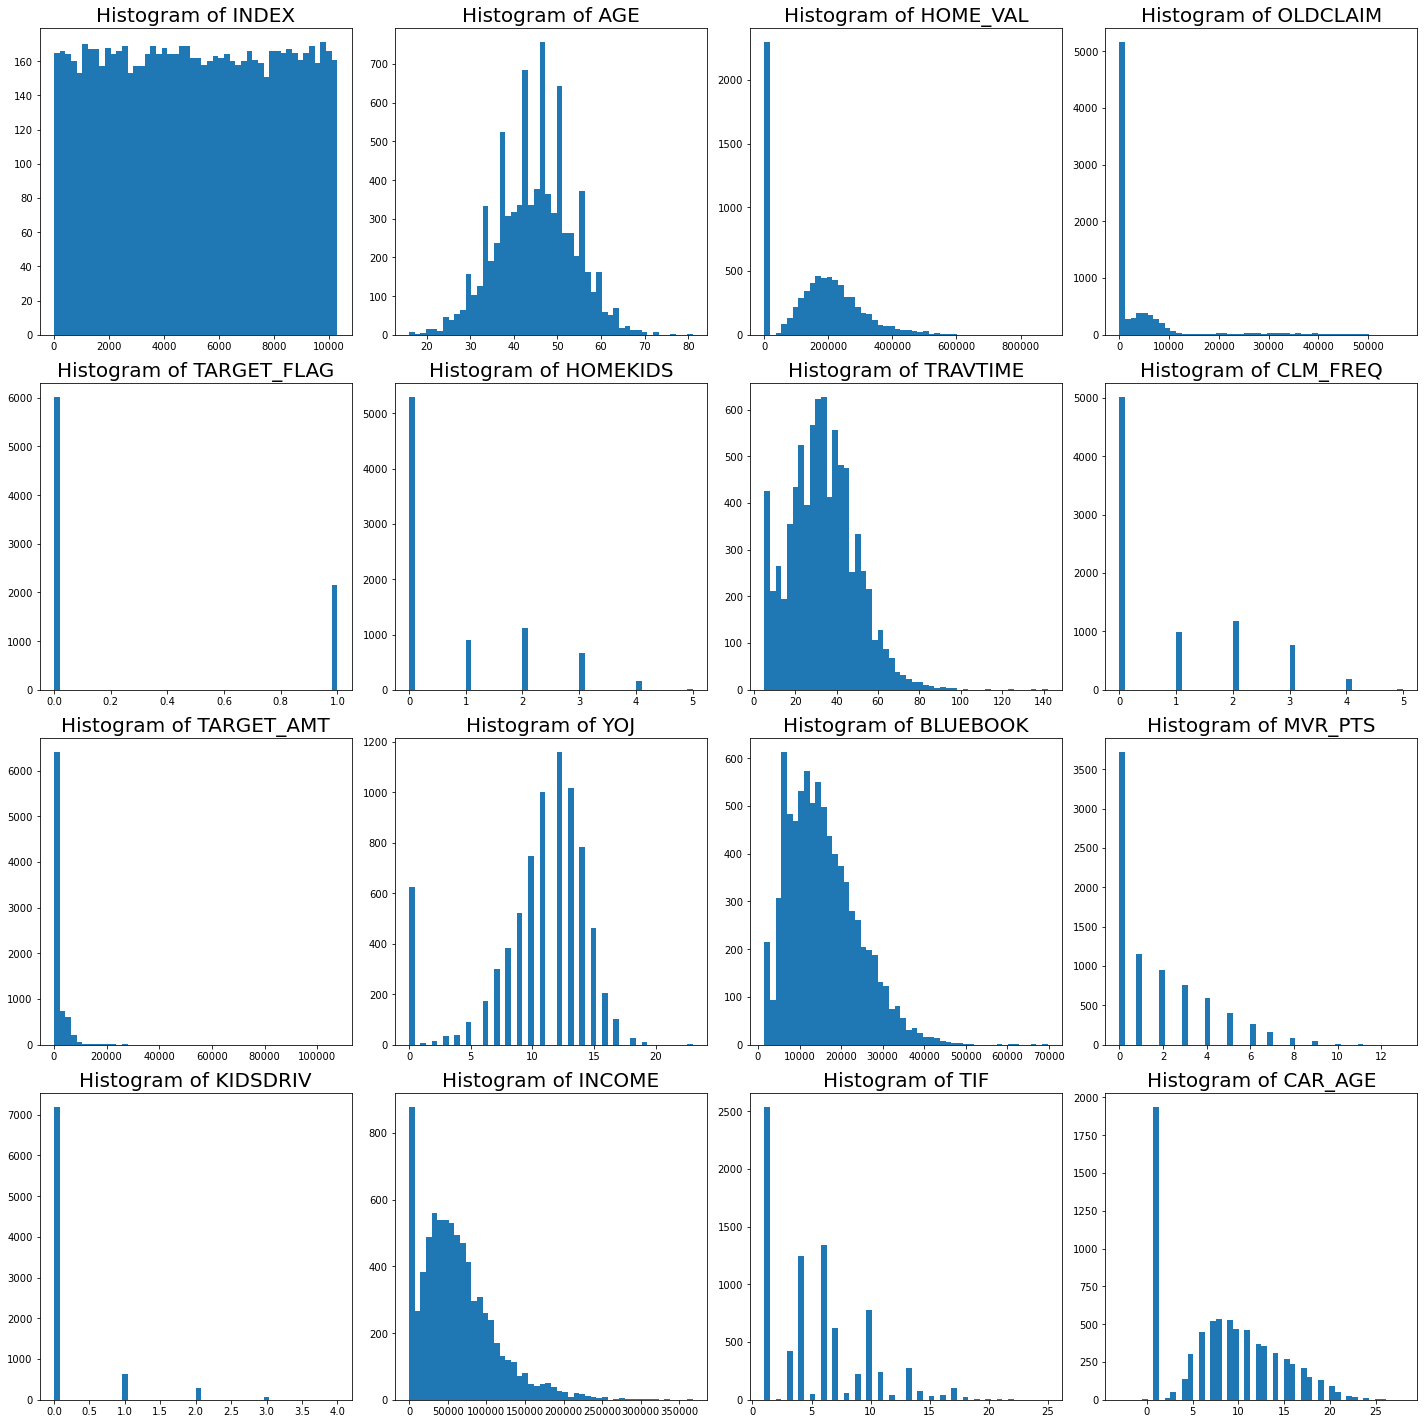

In [25]:
fig, axs = plt.subplots(4, 4, figsize=(20, 20))
for i, col in enumerate(numeric_cols):
    axs[i%4,i//4].hist(train_df[col], bins=50)
    axs[i%4,i//4].set_title(f"Histogram of {col}", fontsize=20)
plt.tight_layout(pad=1.5, w_pad=0.5, h_pad=1.0)

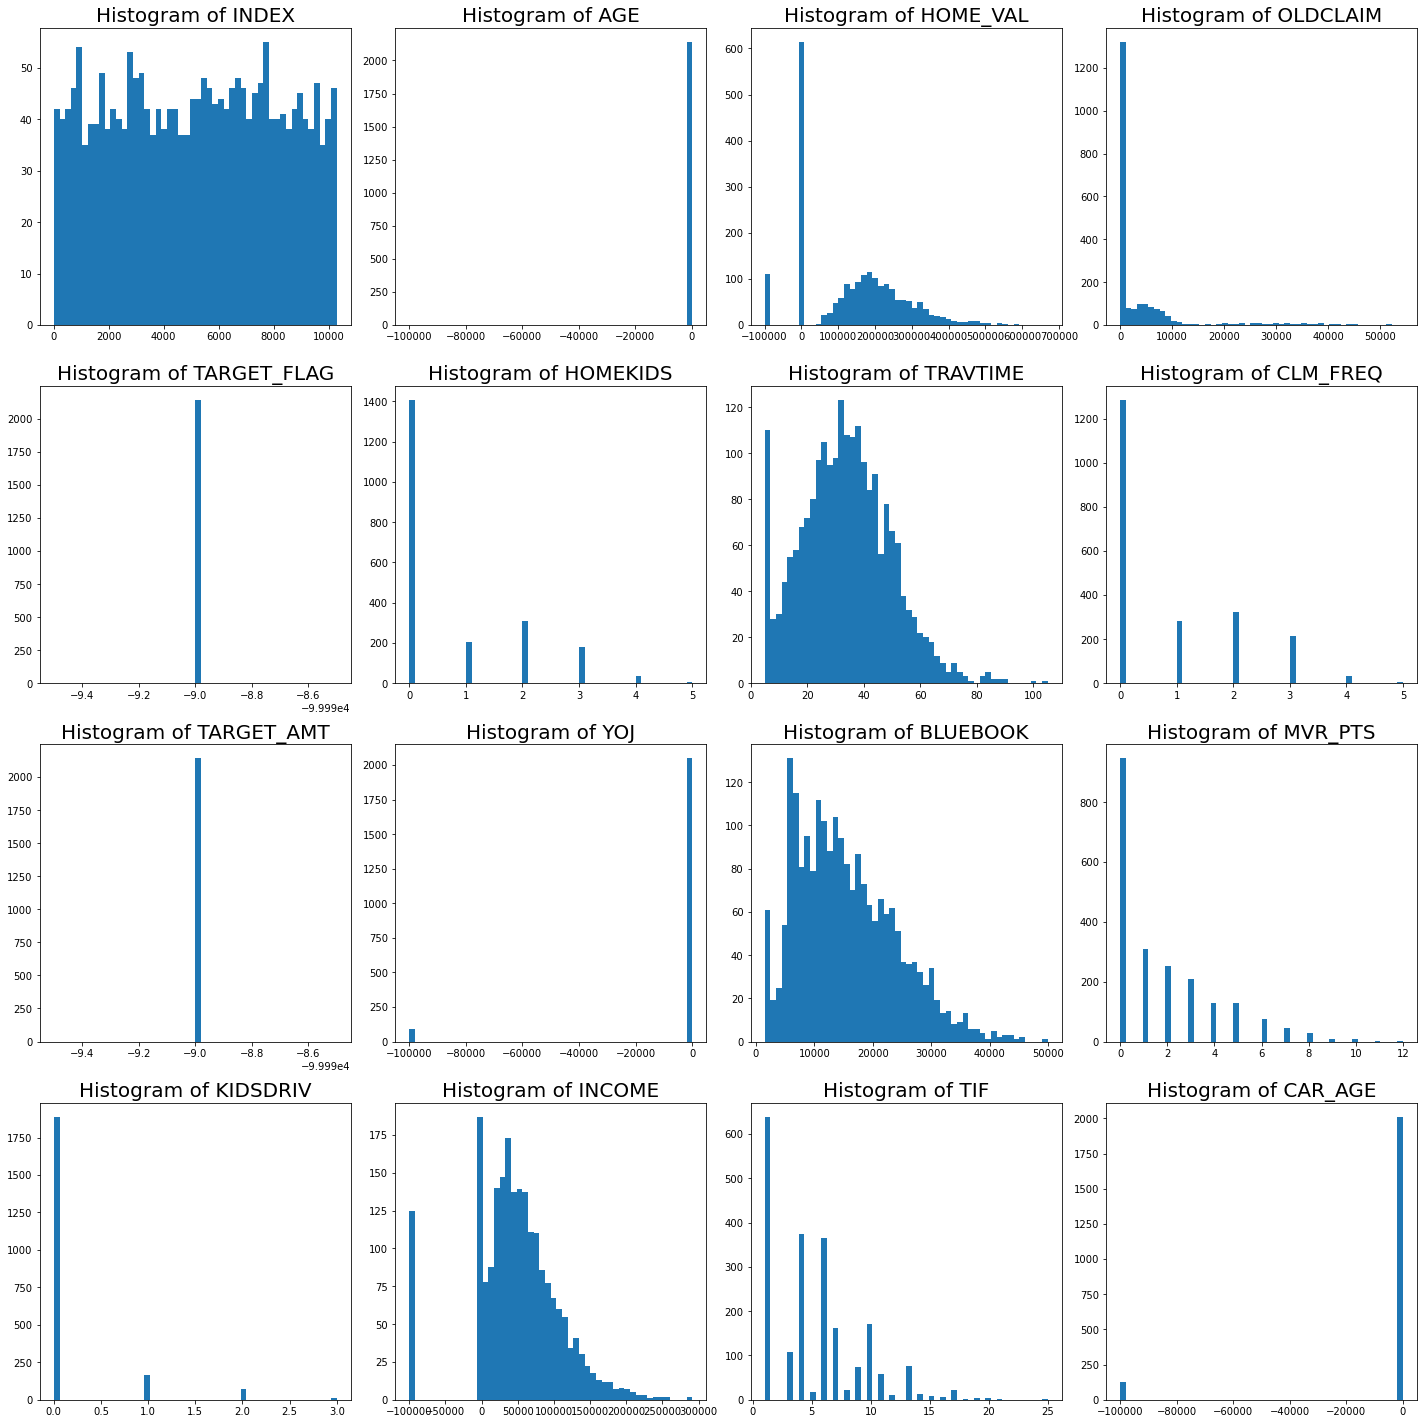

In [26]:
fig, axs = plt.subplots(4, 4, figsize=(20, 20))
for i, col in enumerate(numeric_cols):
    axs[i%4,i//4].hist(test_df[col].fillna(-99999), bins=50)
    axs[i%4,i//4].set_title(f"Histogram of {col}", fontsize=20)
plt.tight_layout(pad=1.5, w_pad=0.5, h_pad=1.0)

Interestingly, in the problem we are also given column TARGET_AMT, which is directly correlated to TARGET flag. One way of improving the model's performance would be to predict value of this feature for the train set using another model and then use it for predicting the flag. TARGET_AMT is continuous so plotting it versus various columns may give us some interesting insights.

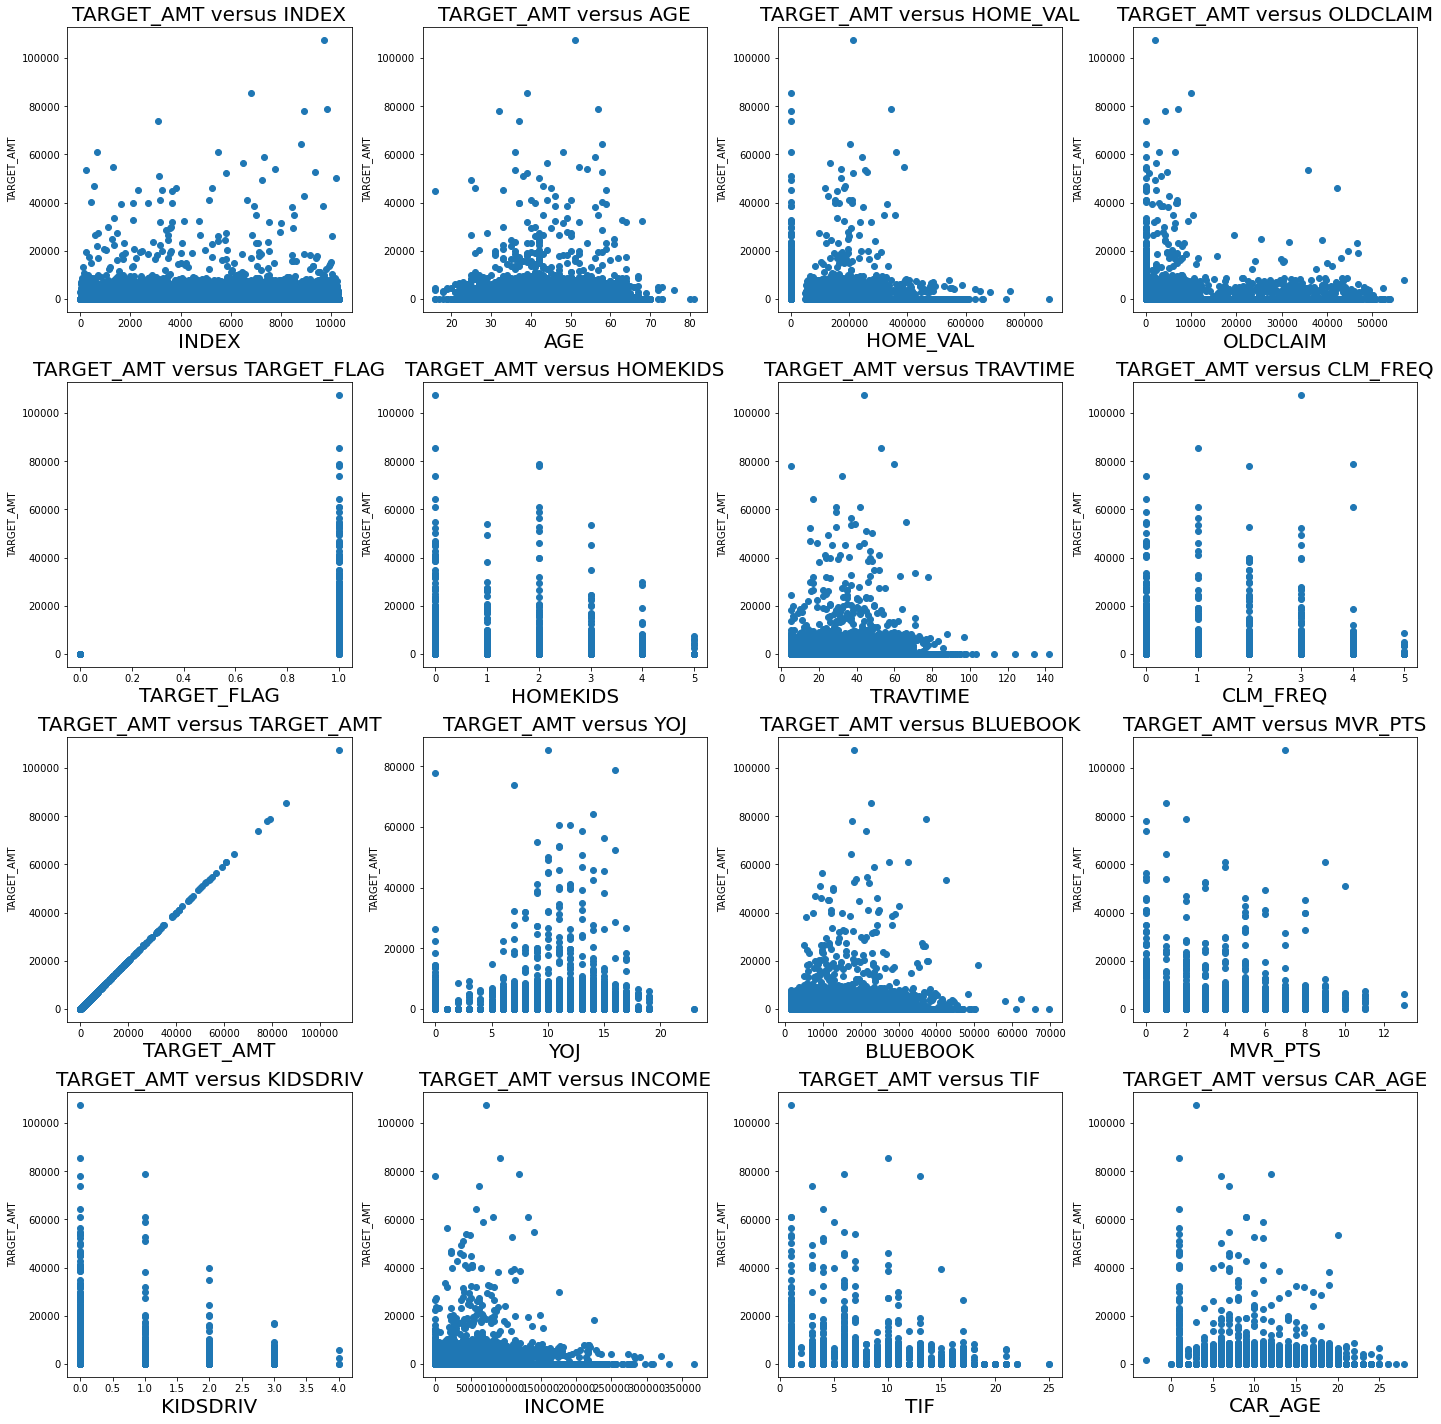

In [27]:
fig, axs = plt.subplots(4, 4, figsize=(20, 20))
for i, col in enumerate(numeric_cols):
    axs[i%4,i//4].scatter(train_df[col], train_df['TARGET_AMT'])
    axs[i%4,i//4].set_title(f"TARGET_AMT versus {col}", fontsize=20)
    axs[i%4,i//4].set_xlabel(col, fontsize=20)
    axs[i%4,i//4].set_ylabel('TARGET_AMT', fontsize=10)

plt.tight_layout(pad=1.5, w_pad=0.5, h_pad=1.0)

### Non-numerical columns

In [28]:
nonnumeric_cols

Index(['PARENT1', 'MSTATUS', 'SEX', 'EDUCATION', 'JOB', 'CAR_USE', 'CAR_TYPE',
       'RED_CAR', 'REVOKED', 'URBANICITY'],
      dtype='object')

In [29]:
for col in nonnumeric_cols:
    print(50*'=')
    print(f"Column: {col}")
    print(train_df[col].value_counts()/train_df.shape[0])

Column: PARENT1
No     0.868031
Yes    0.131969
Name: PARENT1, dtype: float64
Column: MSTATUS
Yes     0.599681
z_No    0.400319
Name: MSTATUS, dtype: float64
Column: SEX
z_F    0.536086
M      0.463914
Name: SEX, dtype: float64
Column: EDUCATION
z_High School    0.285504
Bachelors        0.274721
Masters          0.203161
<High School     0.147408
PhD              0.089205
Name: EDUCATION, dtype: float64
Column: JOB
z_Blue Collar    0.223625
Clerical         0.155741
Professional     0.136870
Manager          0.121064
Lawyer           0.102316
Student          0.087244
Home Maker       0.078544
Doctor           0.030143
Name: JOB, dtype: float64
Column: CAR_USE
Private       0.628845
Commercial    0.371155
Name: CAR_USE, dtype: float64
Column: CAR_TYPE
z_SUV          0.281093
Minivan        0.262835
Pickup         0.170200
Sports Car     0.111138
Van            0.091901
Panel Truck    0.082833
Name: CAR_TYPE, dtype: float64
Column: RED_CAR
no     0.708614
yes    0.291386
Name: RED_CAR,

In [30]:
for col in nonnumeric_cols:
    print(50*'=')
    print(f"Column: {col}")
    print(test_df[col].value_counts()/test_df.shape[0])

Column: PARENT1
No     0.875759
Yes    0.124241
Name: PARENT1, dtype: float64
Column: MSTATUS
Yes     0.60439
z_No    0.39561
Name: MSTATUS, dtype: float64
Column: SEX
z_F    0.546474
M      0.453526
Name: SEX, dtype: float64
Column: EDUCATION
z_High School    0.290518
Bachelors        0.271369
Masters          0.196170
<High School     0.145726
PhD              0.096217
Name: EDUCATION, dtype: float64
Column: JOB
z_Blue Collar    0.216254
Clerical         0.148996
Professional     0.135918
Manager          0.125642
Home Maker       0.094348
Lawyer           0.091546
Student          0.087342
Doctor           0.035030
Name: JOB, dtype: float64
Column: CAR_USE
Private       0.645026
Commercial    0.354974
Name: CAR_USE, dtype: float64
Column: CAR_TYPE
z_SUV          0.275105
Minivan        0.256422
Pickup         0.178888
Sports Car     0.127043
Panel Truck    0.082672
Van            0.079869
Name: CAR_TYPE, dtype: float64
Column: RED_CAR
no     0.720691
yes    0.279309
Name: RED_CAR, d

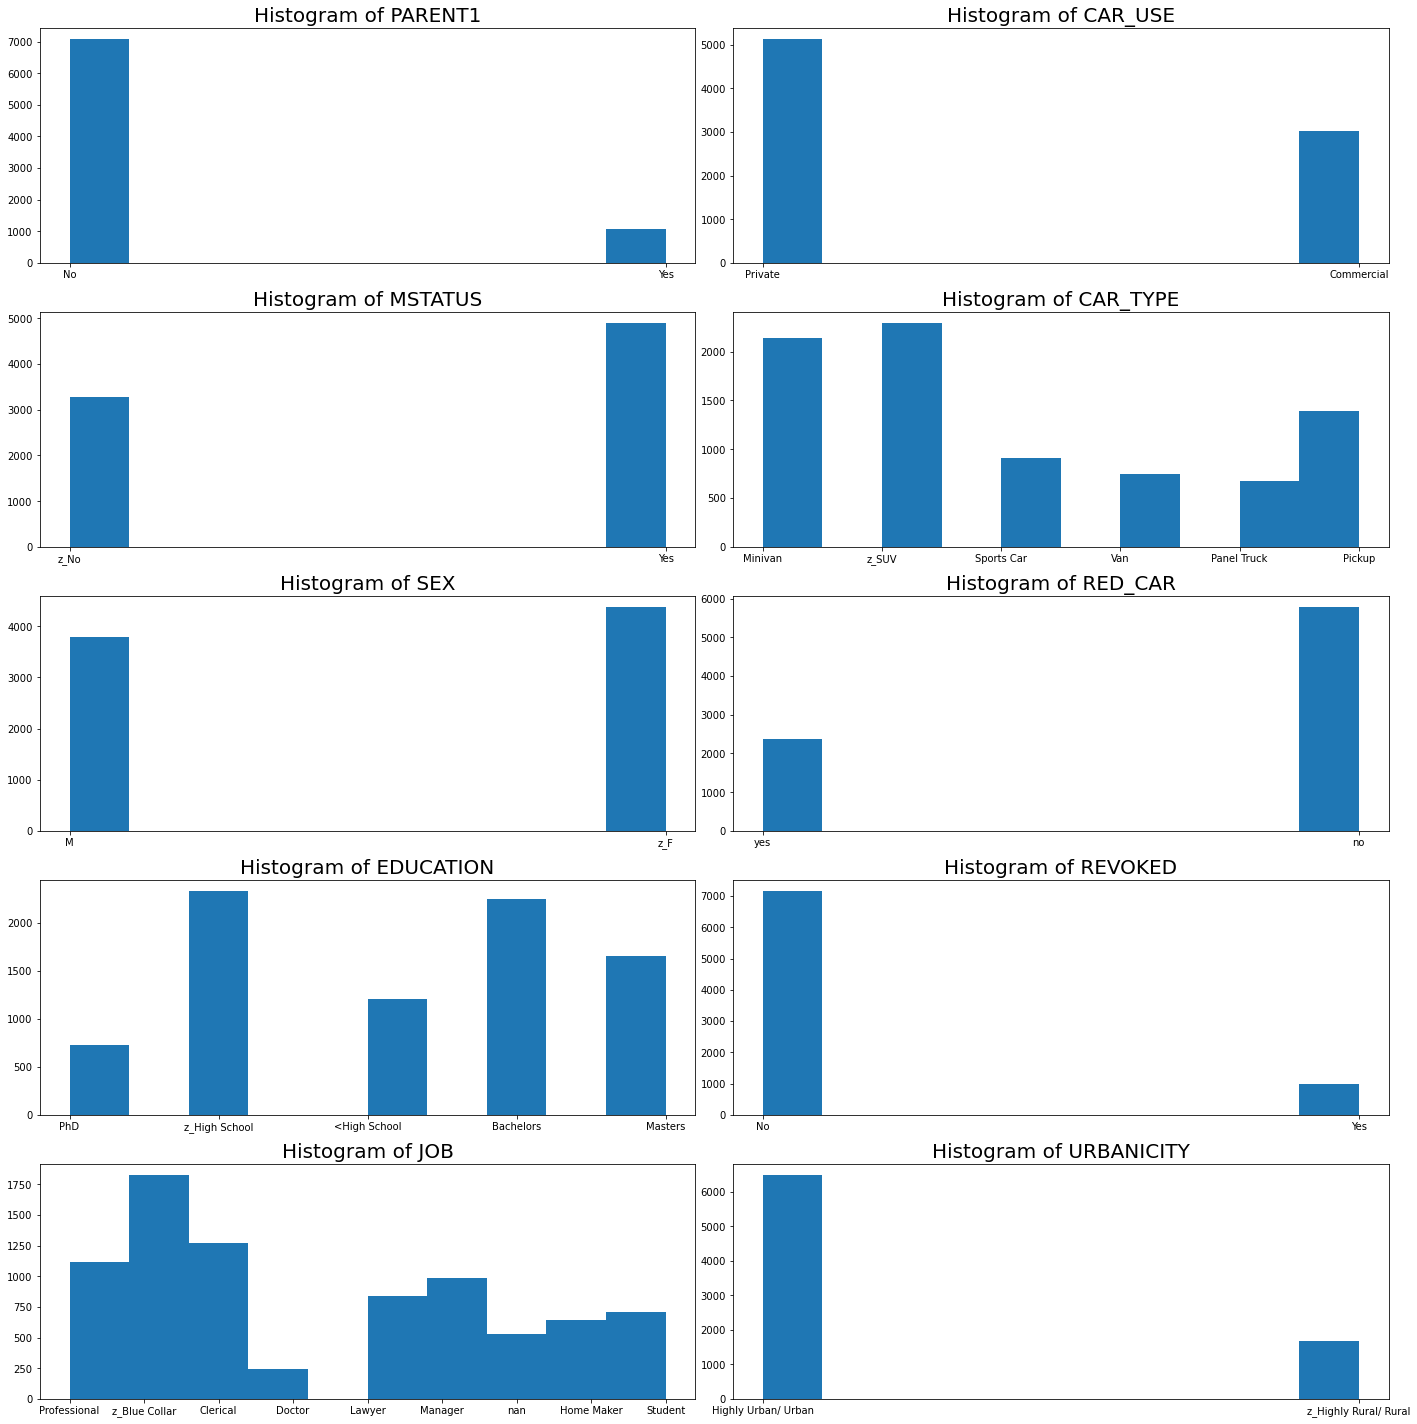

In [31]:
fig, axs = plt.subplots(5, 2, figsize=(20, 20))
for i, col in enumerate(nonnumeric_cols):
    axs[i%5,i//5].hist(train_df[col], bins=10)
    axs[i%5,i//5].set_title(f"Histogram of {col}", fontsize=20)
plt.tight_layout(pad=1.5, w_pad=0.5, h_pad=1.0)

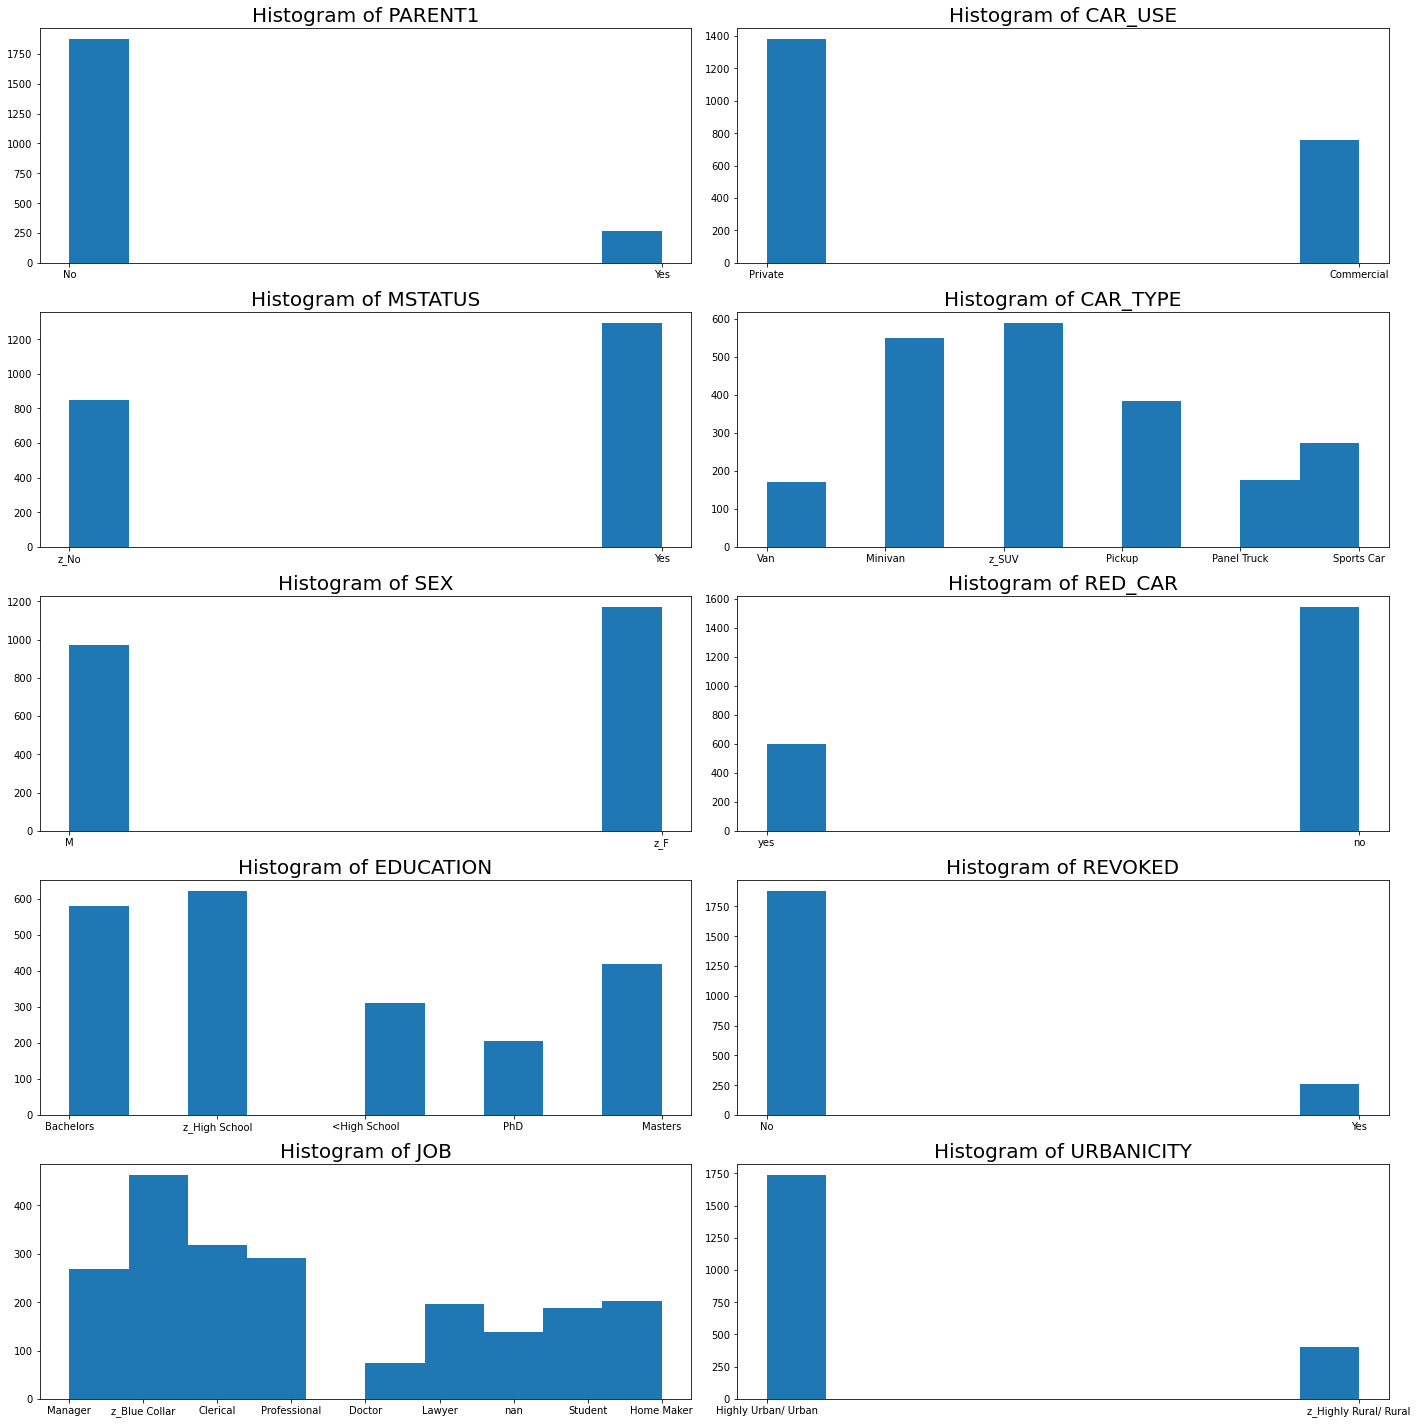

In [32]:
fig, axs = plt.subplots(5, 2, figsize=(20, 20))
for i, col in enumerate(nonnumeric_cols):
    axs[i%5,i//5].hist(test_df[col], bins=10)
    axs[i%5,i//5].set_title(f"Histogram of {col}", fontsize=20)
plt.tight_layout(pad=1.5, w_pad=0.5, h_pad=1.0)

### Merging two DataFrames

In [33]:
target = train_df['TARGET_FLAG']
target_amt = train_df['TARGET_AMT']

In [34]:
train_df = train_df.drop(['TARGET_FLAG', 'TARGET_AMT', 'INDEX'], axis=1)
test_df = test_df.drop(['TARGET_FLAG', 'TARGET_AMT', 'INDEX'], axis=1)

In [35]:
train_df['is_train'] = 1
test_df['is_train'] = 0

In [36]:
df = pd.concat([train_df, test_df]).reset_index(drop=True)

In [37]:
df[nonnumeric_cols] = df[nonnumeric_cols].fillna('-99999')
df = df.fillna(-99999)

Now it's high time to transform the nonnumerical columns to numerical ones! In order to do that, I am going to use a simple LabelEncoder. Since, I am planning to use a **Tree based model**, this is the simplest possible case. However please note, that for linear models, this is not a good idea, since they expect the data to be normalized.

In [38]:
enc = Encoder(nonnumeric_cols)
df = enc.fit_transform(df)
enc.save(path='../production_tools/encoders.pkl')

In [43]:
tsne = TSNE(n_components=2)
# We don't include the last column is_train
transformed_df = tsne.fit_transform(df.iloc[:,:-1].values)

In [44]:
train_idx = (df['is_train']==1)
test_idx = (df['is_train']==0)

Text(0.5, 1.0, 'T-SNE projection of the datasets')

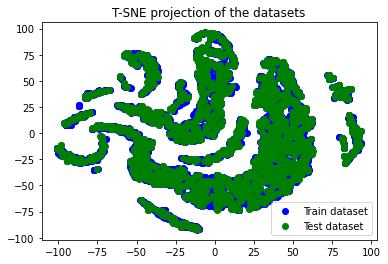

In [45]:
plt.scatter(transformed_df[train_idx,0], transformed_df[train_idx,1], c='blue', label='Train dataset')
plt.scatter(transformed_df[test_idx,0], transformed_df[test_idx,1],c='g', label='Test dataset')
plt.legend()
plt.title("T-SNE projection of the datasets")

In [46]:
train_cols = ['KIDSDRIV', 'AGE', 'HOMEKIDS', 'YOJ', 'INCOME', 'PARENT1', 'HOME_VAL',
       'MSTATUS', 'SEX', 'EDUCATION', 'JOB', 'TRAVTIME', 'CAR_USE', 'BLUEBOOK',
       'TIF', 'CAR_TYPE', 'RED_CAR', 'OLDCLAIM', 'CLM_FREQ', 'REVOKED',
       'MVR_PTS', 'CAR_AGE', 'URBANICITY']

In [47]:
tsne_train = TSNE(n_components=2)
# We don't include the last column is_train
transformed_train = tsne_train.fit_transform(df.loc[train_idx , train_cols].values)

Text(0.5, 1.0, '2D TSNE projection of the train set coloured by the class')

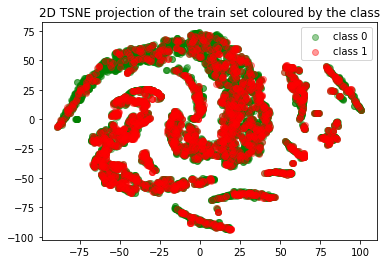

In [48]:
plt.scatter(transformed_train[(target==0),0], transformed_train[(target==0),1], label='class 0', c='g', alpha=0.4)
plt.scatter(transformed_train[(target==1),0], transformed_train[(target==1),1], label='class 1', c='r', alpha=0.4)
plt.legend()
plt.title("2D TSNE projection of the train set coloured by the class")